In [3]:
# Step 1: Importing Required Libraries

import pandas as pd               # for data manipulation
import numpy as np                # for numerical operations
import matplotlib.pyplot as plt   # for visualizations
import seaborn as sns             # for advanced plots

# Set a style for seaborn plots
sns.set(style="whitegrid")

%matplotlib inline


In [4]:



df = pd.read_csv("C:/Users/USER/Downloads/transfusion.csv")

# Display the first 5 rows
df.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# Step 3: Renaming the column for better understanding

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']


df.head()


,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:


# Show data types and non-null counts
df.info()

# Check for missing/null values
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB

Missing values in each column:
Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64


In [11]:
# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()


Duplicate rows: 215


In [13]:
# Summary statistics
df.describe()


,Recency,Frequency,Monetary,Time,Donated
count,533.000000,533.000000,533.000000,533.000000,533.00000
mean,9.529081,6.990619,1747.654784,42.303940,0.27955
std,8.250860,6.265875,1566.468760,23.295291,0.44920
min,0.000000,1.000000,250.000000,2.000000,0.00000
25%,3.000000,3.000000,750.000000,26.000000,0.00000
50%,8.000000,5.000000,1250.000000,38.000000,0.00000
75%,14.000000,9.000000,2250.000000,58.000000,1.00000
max,74.000000,50.000000,12500.000000,98.000000,1.00000


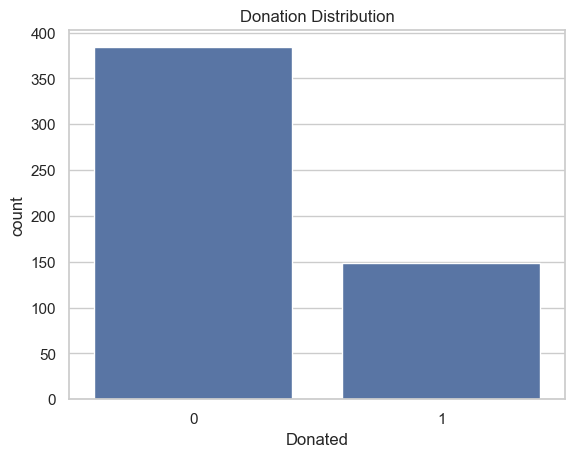

In [15]:
# Class distribution
sns.countplot(x='Donated', data=df)
plt.title("Donation Distribution")
plt.show()


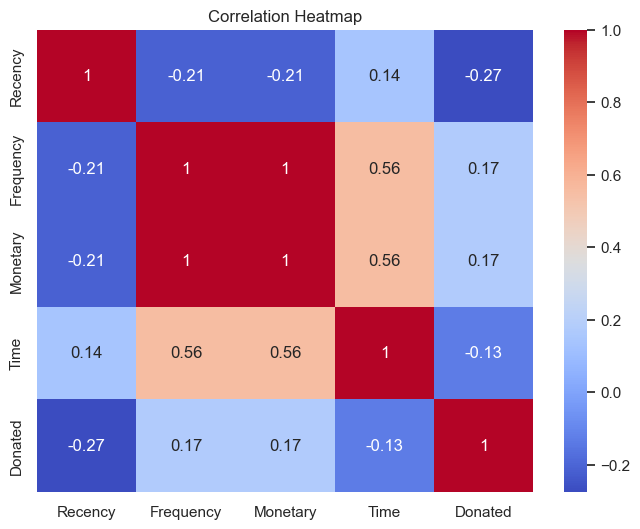

In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


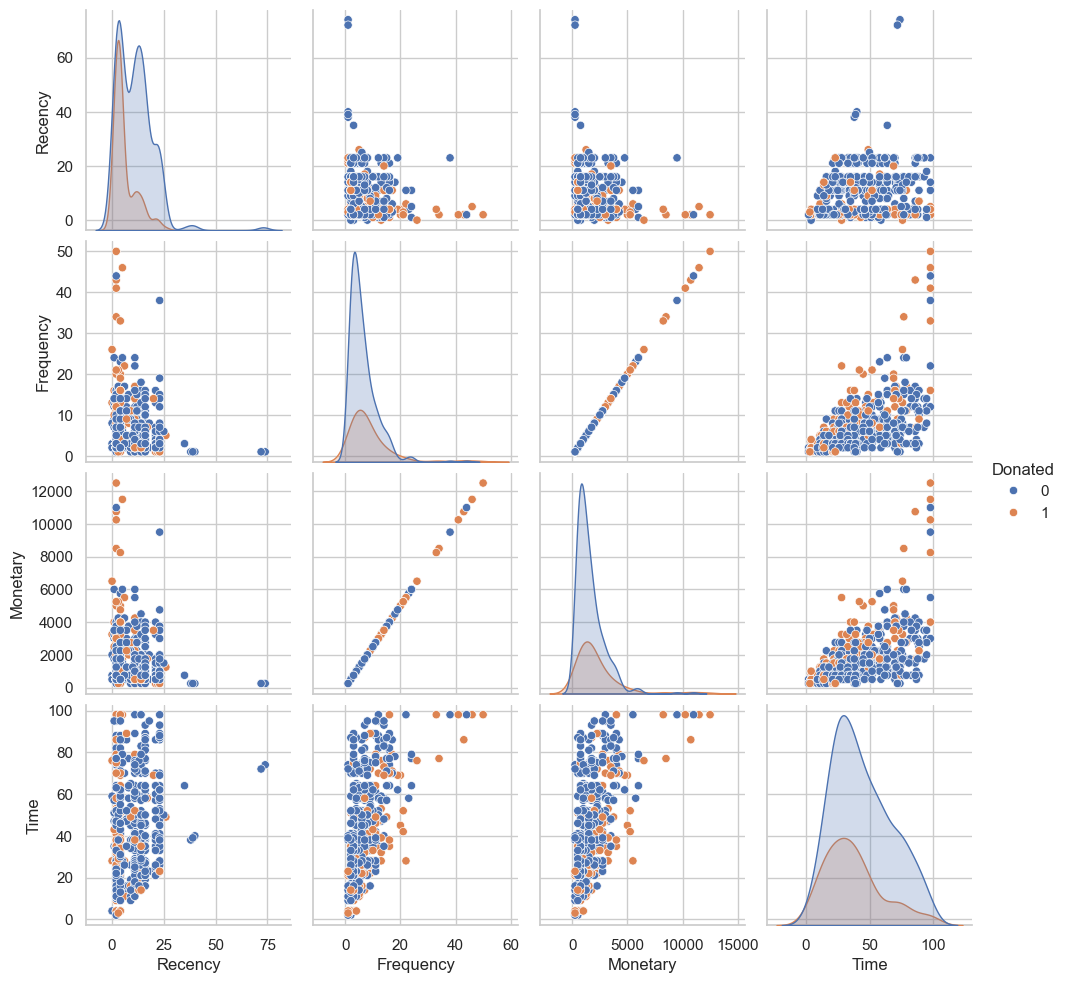

In [19]:
sns.pairplot(df, hue='Donated')
plt.show()


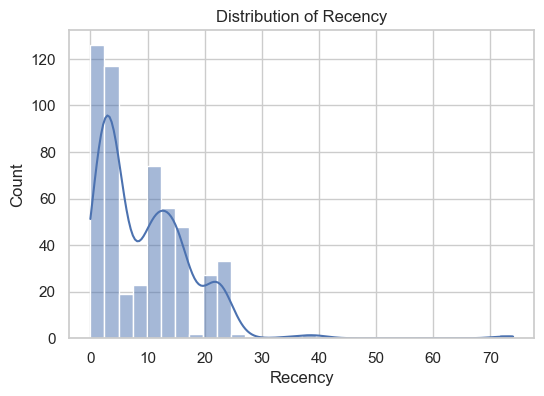

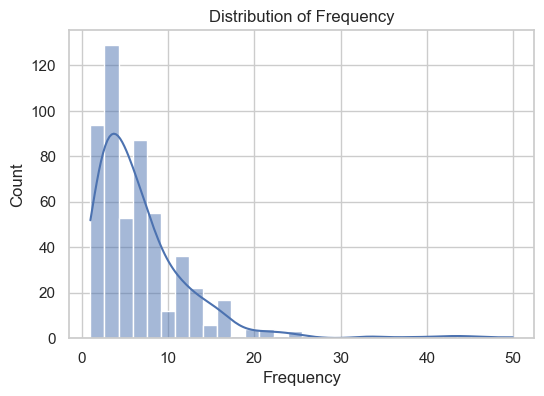

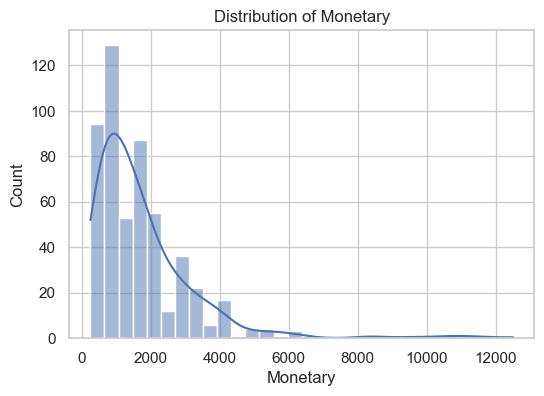

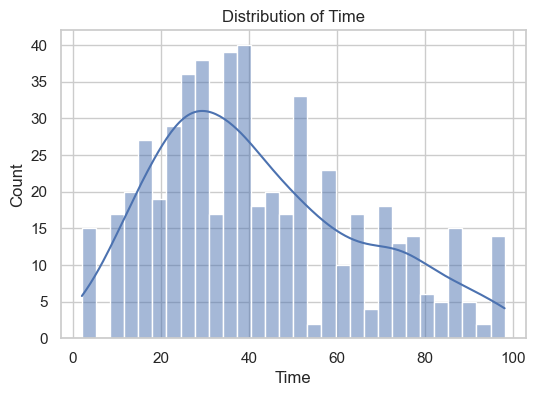

In [23]:


numerical_cols = ['Recency', 'Frequency', 'Monetary', 'Time']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


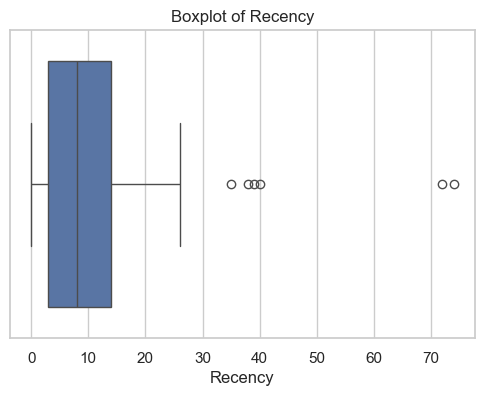

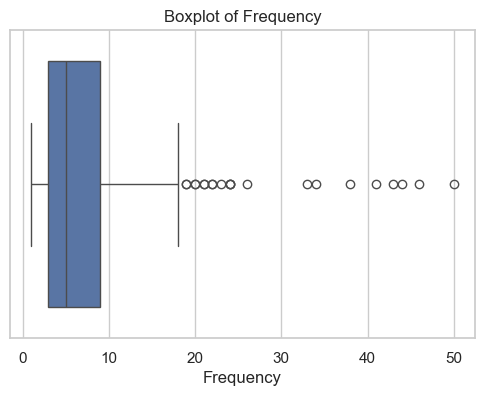

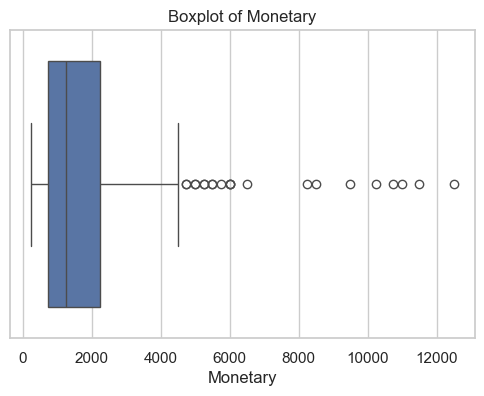

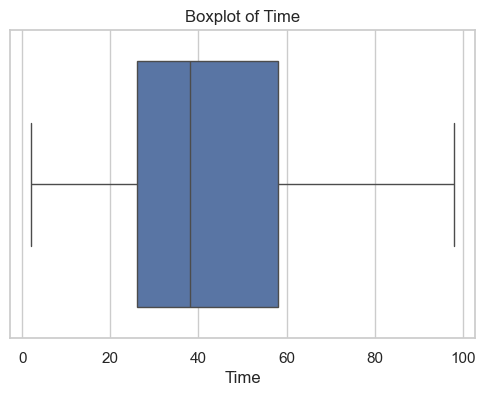

In [25]:


features = ['Recency', 'Frequency', 'Monetary', 'Time']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


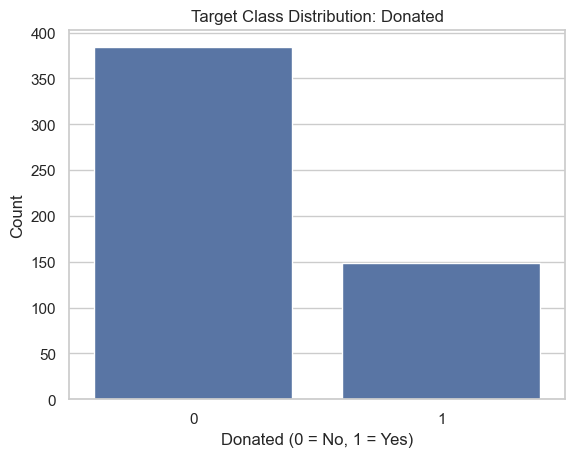

Donated
0    384
1    149
Name: count, dtype: int64


In [37]:


sns.countplot(x='Donated', data=df)
plt.title("Target Class Distribution: Donated")
plt.xlabel("Donated (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print actual numbers
print(df['Donated'].value_counts())


In [39]:
from sklearn.preprocessing import StandardScaler

# Step 11: Scale features
scaler = StandardScaler()

X = df.drop('Donated', axis=1)
y = df['Donated']

X_scaled = scaler.fit_transform(X)


In [41]:
from sklearn.model_selection import train_test_split

# Step 12: Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LogisticRegression

# Step 13: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Step 14.1: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


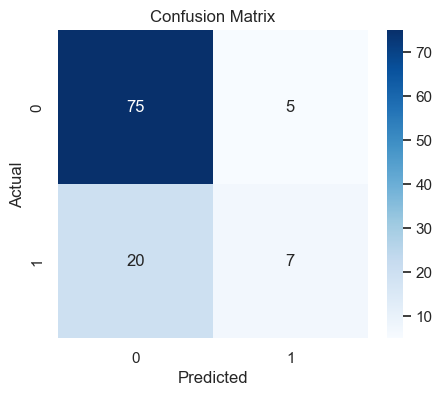

In [47]:
# Step 14.2: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [53]:
# Step 14.3: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        80
           1       0.58      0.26      0.36        27

    accuracy                           0.77       107
   macro avg       0.69      0.60      0.61       107
weighted avg       0.74      0.77      0.73       107



ROC AUC Score: 0.78


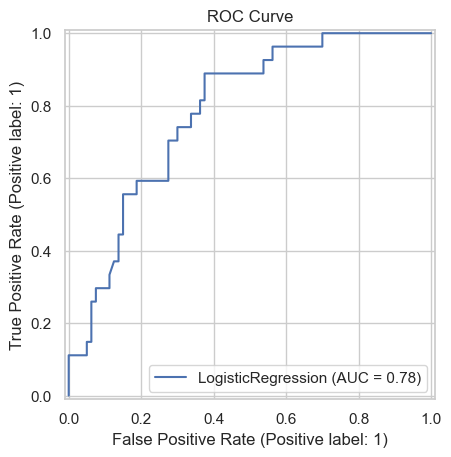

In [55]:
# Step 14.4: ROC AUC and Curve
y_probs = model.predict_proba(X_test)[:, 1]  # probabilities for class 1
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()
